## Import Library

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Read Data

In [37]:
# laod data
url = "Data/MANU.csv"
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,21.240000,21.600000,20.709999,20.940001,20.024546,25500
1,2018-11-01,21.100000,21.500000,20.809999,21.330000,20.397497,24700
2,2018-11-02,21.330000,21.490000,21.110001,21.260000,20.330559,19500
3,2018-11-05,21.370001,21.389999,21.010000,21.250000,20.320997,20300
4,2018-11-06,21.180000,21.740000,21.170000,21.740000,20.789572,25700


## EDA

In [38]:
df.shape

(1257, 7)

In [39]:
# cek info datasete
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


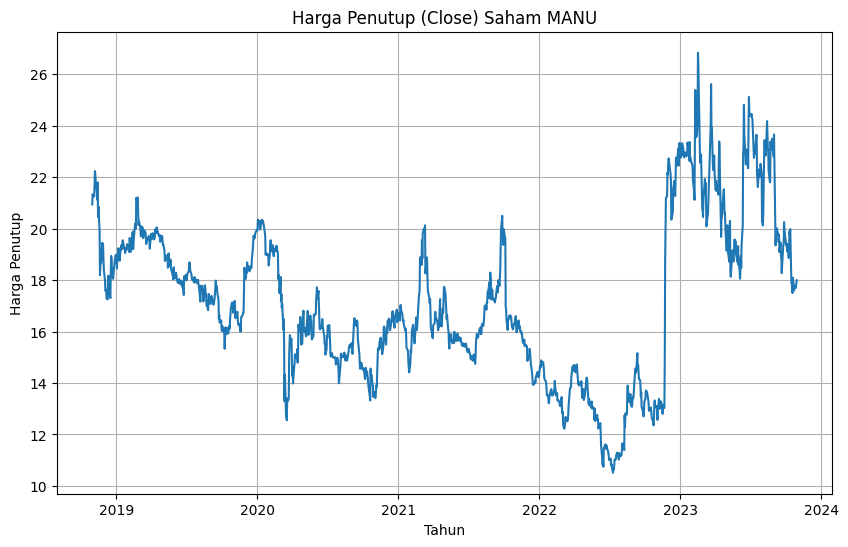

In [40]:
# Mengonversi kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Harga Penutup (Close) Saham MANU')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutup')
plt.grid(True)
plt.show()

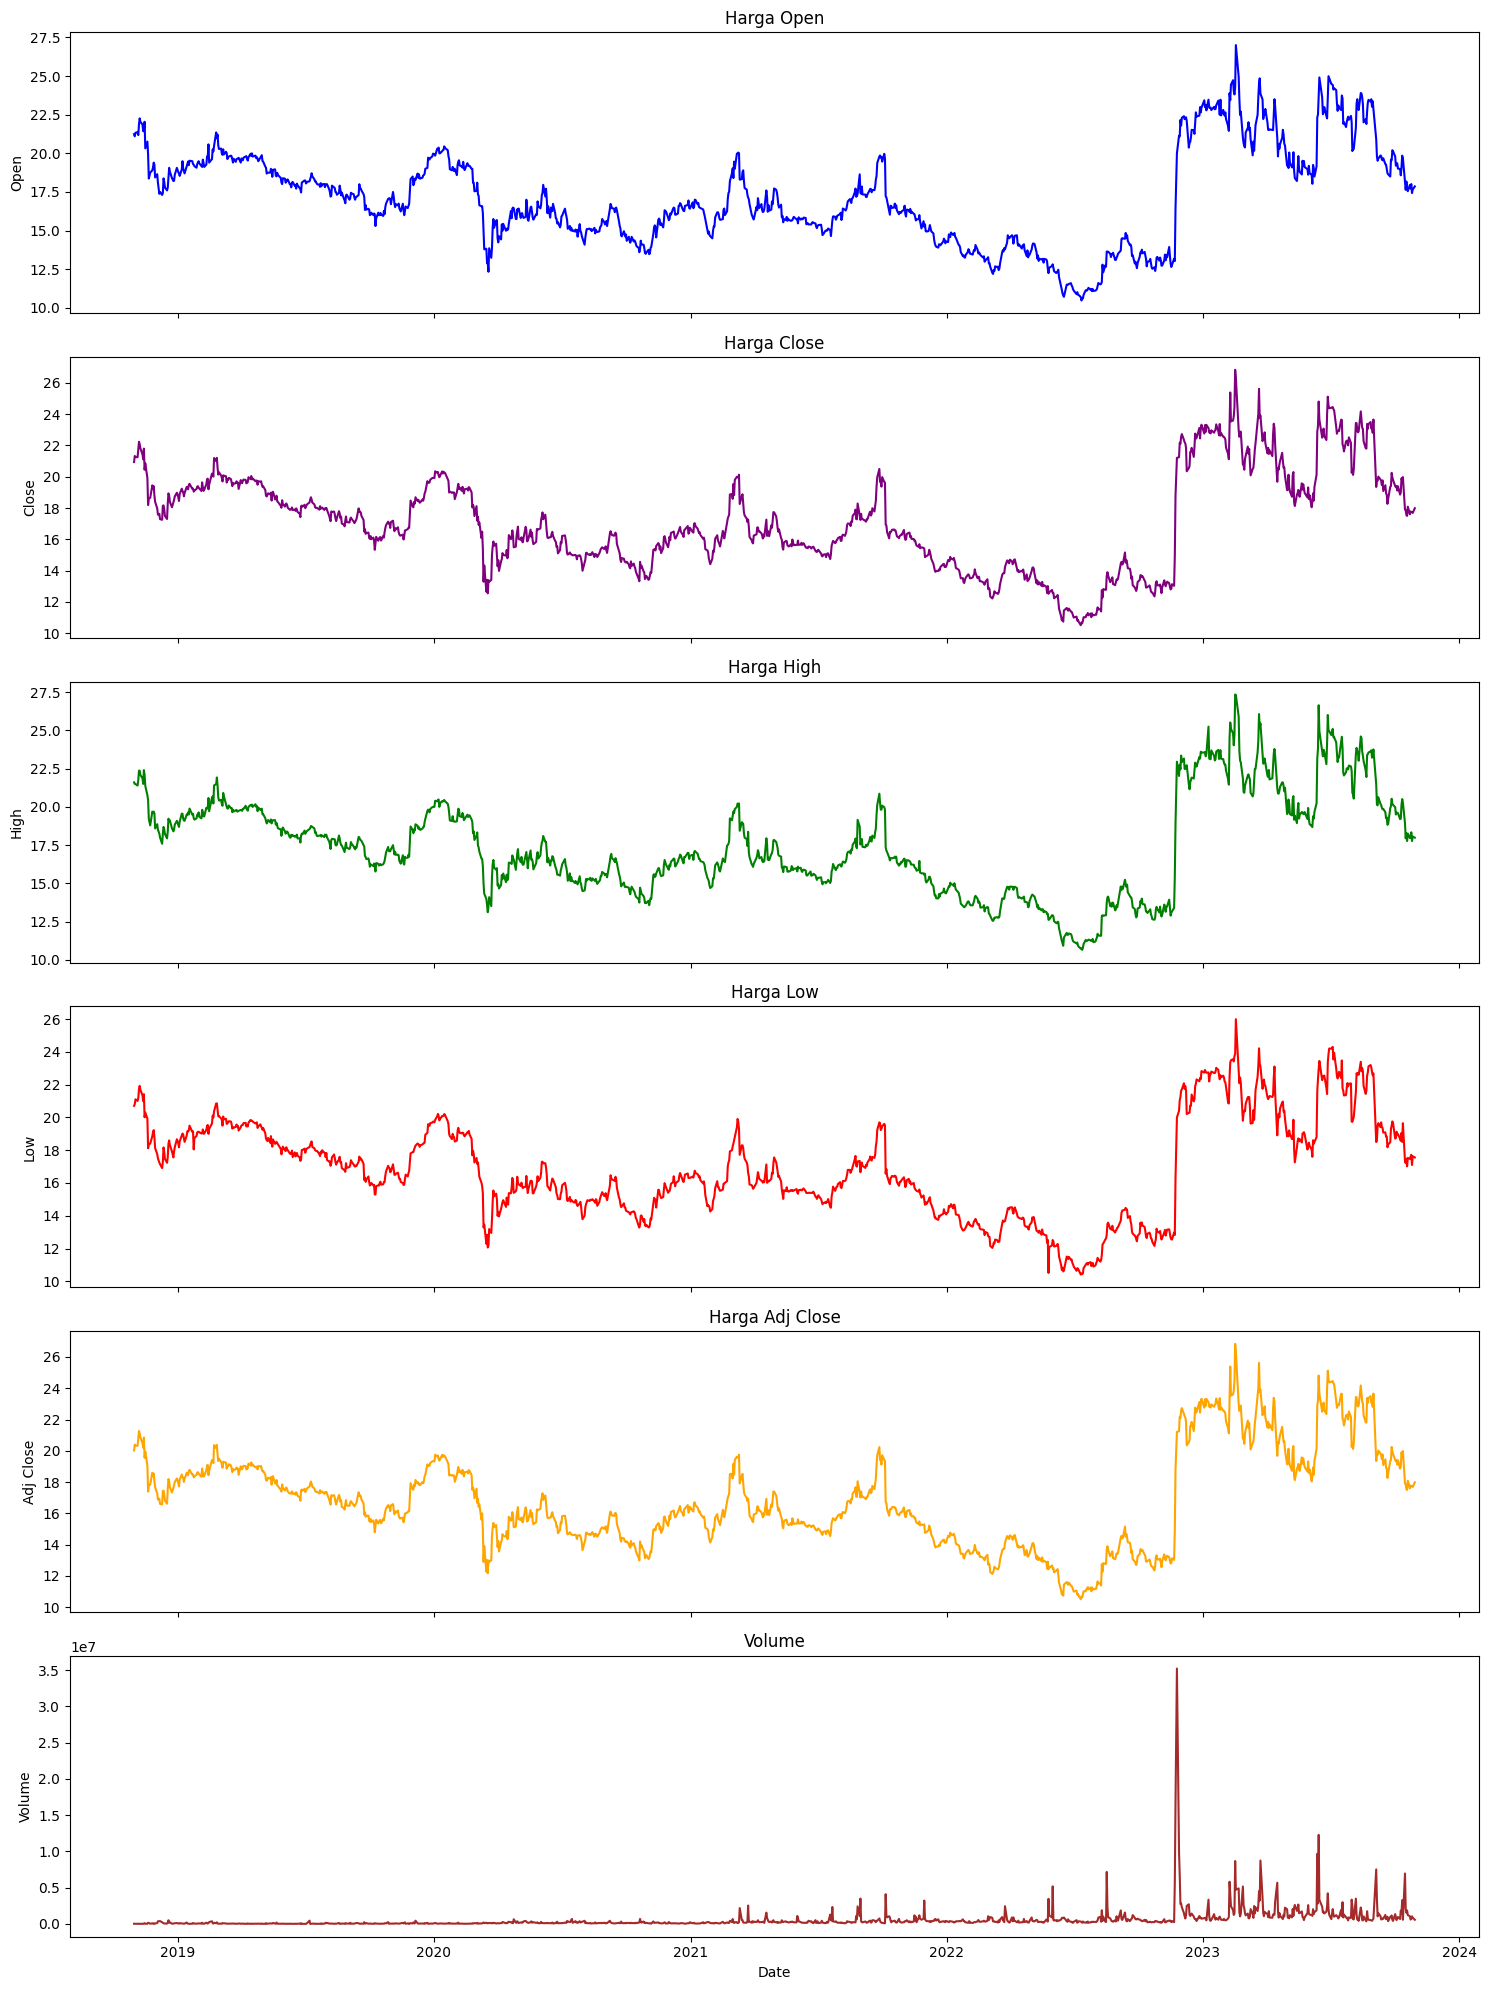

In [41]:
# # Mengonversi kolom 'Date' menjadi tipe data datetime
# df['Date'] = pd.to_datetime(df['Date'])

# Membuat subplots
fig, axes = plt.subplots(6, 1, figsize=(15, 20), sharex=True)

# Grafik untuk Open
sns.lineplot(ax=axes[0], data=df, x='Date', y='Open', color='blue')
axes[0].set_title('Harga Open')

# Grafik untuk Close
sns.lineplot(ax=axes[1], data=df, x='Date', y='Close', color='purple')
axes[1].set_title('Harga Close')

# Grafik untuk High
sns.lineplot(ax=axes[2], data=df, x='Date', y='High', color='green')
axes[2].set_title('Harga High')

# Grafik untuk Low
sns.lineplot(ax=axes[3], data=df, x='Date', y='Low', color='red')
axes[3].set_title('Harga Low')

# Grafik untuk Adj Close
sns.lineplot(ax=axes[4], data=df, x='Date', y='Adj Close', color='orange')
axes[4].set_title('Harga Adj Close')

# Grafik untuk Volume
sns.lineplot(ax=axes[5], data=df, x='Date', y='Volume', color='brown')
axes[5].set_title('Volume')

# Menampilkan plot
plt.tight_layout()
plt.show()

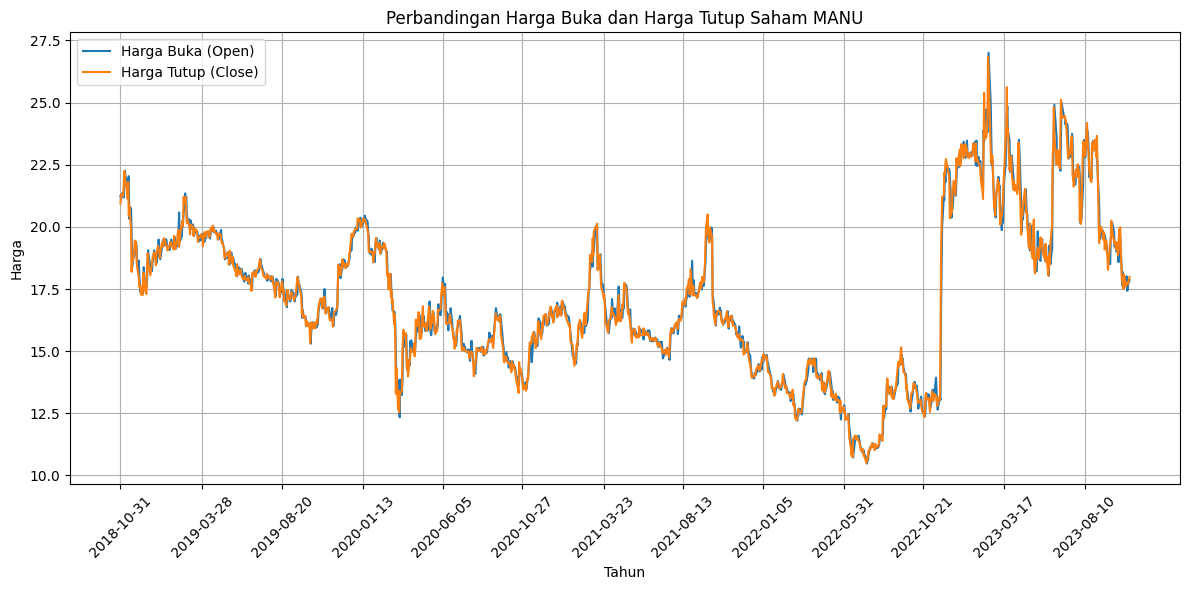

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Harga Buka (Open)')
plt.plot(df['Date'], df['Close'], label='Harga Tutup (Close)')
plt.title('Perbandingan Harga Buka dan Harga Tutup Saham MANU')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.xticks(df['Date'][::100], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

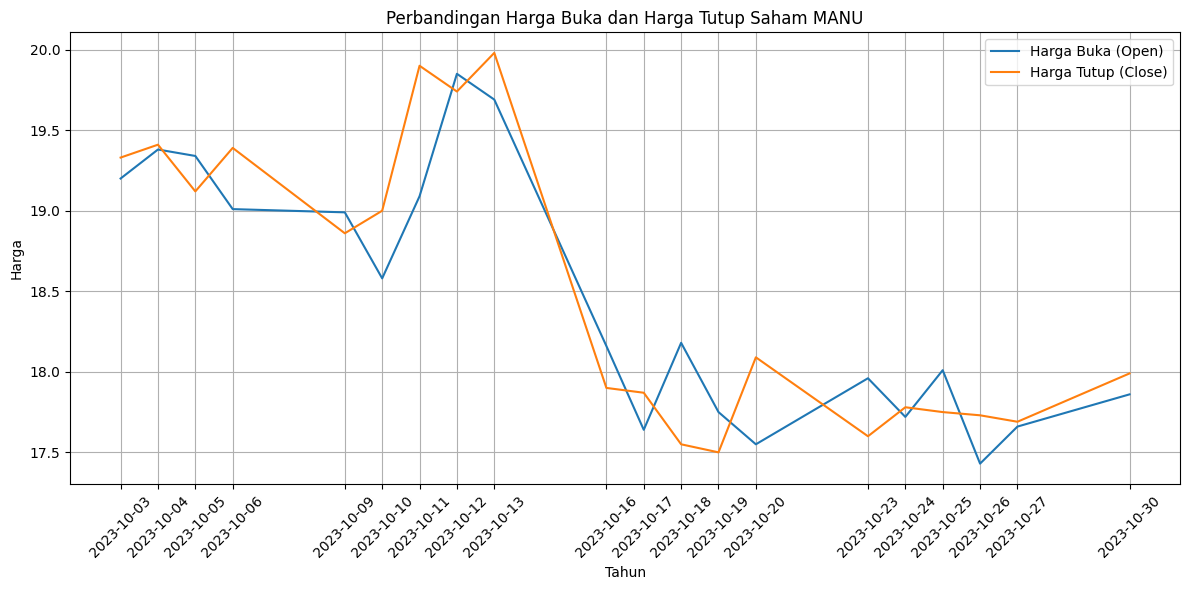

In [43]:
# Zoom perbandingan antara harga buka dan tutup
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][-20:], df['Open'][-20:], label='Harga Buka (Open)')
plt.plot(df['Date'][-20:], df['Close'][-20:], label='Harga Tutup (Close)')
plt.title('Perbandingan Harga Buka dan Harga Tutup Saham MANU')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.xticks(df['Date'][-20:], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.035482,0.057158,0.019190,0.042266,0.126234,0.361583
Open,0.035482,1.000000,0.994819,0.995662,0.991956,0.987714,0.224785
High,0.057158,0.994819,1.000000,0.992610,0.996076,0.993782,0.275086
Low,0.019190,0.995662,0.992610,1.000000,0.995633,0.989950,0.205592
Close,0.042266,0.991956,0.996076,0.995633,1.000000,0.996357,0.246727
Adj Close,0.126234,0.987714,0.993782,0.989950,0.996357,1.000000,0.276740
Volume,0.361583,0.224785,0.275086,0.205592,0.246727,0.276740,1.000000


## Preprocessing

In [45]:
# cek missing value
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
# Cek duplikasi
df.duplicated().sum()

0

In [47]:
# Mengecek apakah selain kolom volumen terdapat yang kosong. Jika ada, hapus.
if df[['Open', 'High', 'Low', 'Close', 'Adj Close']].isnull().values.any():
    # Cetak nilai-nilai yang kosong
    print("Nilai yang kosong ada pada kolom:")
    print(df[['Open', 'High', 'Low', 'Close', 'Adj Close']][df[['Open', 'High', 'Low', 'Close', 'Adj Close']].isnull().any(axis=1)])

    # hapus jika ada yang kosong
    df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close'], inplace=True)
else :
    print("Nilai yang kosong tidak ditemukan !")


Nilai yang kosong tidak ditemukan !


## Ekstraksi Feature

In [48]:
# Ekstarksi fitur menggunakan RSI
# untuk menentukan label pada kelas maka melakukan perbandingan dari hasil RSI dengen ketentuan:
# 1. Jika > 70 maka Overbought (Naik === Jual) maka dilabelkan menajdi 1
# 2. Jika < 30 maka Oversold (Tutun === Beli) maka dilabelkan menajdi -1
# 3. Jika 30 - 70 maka hold (Tahan) maka dilabelkan menajdi 0

In [49]:
# define the period parameter for RSI
period_RSI=14

In [50]:
differencePrice = df['Close'].diff()
differencePriceValues=differencePrice.values

In [51]:
positive_differences=0
negative_differences=0
current_average_positive=0
current_average_negative=0
price_index=0
RSI=[]

In [52]:
for difference in differencePriceValues[1:]:
     
    if difference>0:
        positive_difference=difference
        negative_difference=0                
    if difference<0:
        negative_difference=np.abs(difference)
        positive_difference=0
    # if difference==0:
    #     negative_difference=0
    #     positive_difference=0
     
    # this if block is used to initialize the averages
    if (price_index<period_RSI):
         
        current_average_positive=current_average_positive+(1/period_RSI)*positive_difference
        current_average_negative=current_average_negative+(1/period_RSI)*negative_difference
               
        if(price_index==(period_RSI-1)):
            #safeguard against current_average_negative=0
            if current_average_negative!=0:
                RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))           
            else:
                RSI.append(100)
    # this is executed for the time steps > period_RSI, the averages are updated recursively        
    else:
         
        current_average_positive=((period_RSI-1)*current_average_positive+positive_difference)/(period_RSI)
        current_average_negative=((period_RSI-1)*current_average_negative+negative_difference)/(period_RSI)
         
        #safeguard against current_average_negative=0
        if current_average_negative!=0:
            RSI.append(100 - 100/(1+(current_average_positive/current_average_negative)))   
        else:
            RSI.append(100)
             
    price_index=price_index+1

In [53]:
#create the RSI time series
RSI_series=pd.Series(data=RSI,index=df['Close'].index[period_RSI:])

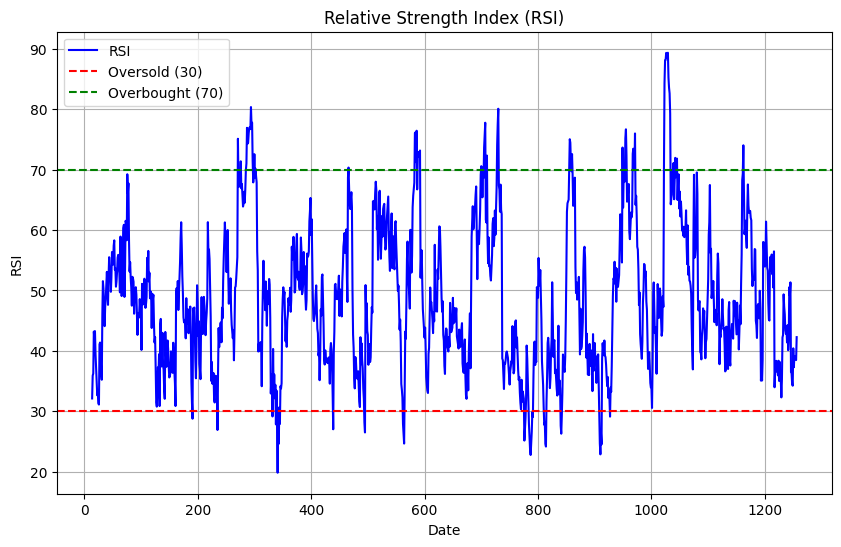

In [54]:
# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(RSI_series, label='RSI', color='blue')
plt.axhline(y=30, color='r', linestyle='--', label='Oversold (30)')
plt.axhline(y=70, color='g', linestyle='--', label='Overbought (70)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
df['RSI'] = RSI_series

In [56]:
df = df.dropna()

In [57]:
df['Target'] = np.where(df['RSI'] > 70, 1, np.where(df['RSI'] < 30, -1, 0))

In [58]:
df[['Close', 'RSI', 'Target']].head(10)

,Close,RSI,Target
14,18.190001,32.119622,0
15,18.610001,35.890401,0
16,18.650000,36.253585,0
17,19.450001,43.186013,0
18,19.250000,41.957539,0
19,19.400000,43.261147,0
20,18.799999,39.444891,0
21,18.400000,37.095516,0
22,17.980000,34.754785,0
23,17.580000,32.642243,0


In [111]:
# # Menghitung jumlah nilai 1 pada kolom 'Target'
# JumNilai_1 = df['Target'].value_counts()[1]
# JumNilai_Min1 = df['Target'].value_counts()[-1]
# JumNilai_0 = df['Target'].value_counts()[0]
# print("Jumlah nilai 1 pada kolom 'Target':", JumNilai_1)
# print("Jumlah nilai -1 pada kolom 'Target':", JumNilai_Min1)
# print("Jumlah nilai 0 pada kolom 'Target':", JumNilai_0)

Jumlah nilai 1 pada kolom 'Target': 65
Jumlah nilai -1 pada kolom 'Target': 38
Jumlah nilai 0 pada kolom 'Target': 1140


#### Normalisasi data

In [60]:
# Menginisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Memilih kolom numerik yang akan dinormalisasi
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI']

# Memilih kolom yang tidak akan dinormalisasi
columns_to_leave = ['Target']

# Salin DataFrame asli jika diperlukan
df_normalized = df.copy()

# Lakukan normalisasi pada kolom-kolom yang dipilih
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])


In [61]:
# Tampilkan hasil
# df_normalized sekarang berisi DataFrame dengan kolom numerik yang telah dinormalisasi dan kolom non-numerik yang tidak diubah
# print(df_normalized)
df_normalized

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Target
14,2018-11-20,0.571429,0.585731,0.494548,0.470300,0.421603,0.004616,0.176826,0
15,2018-11-21,0.477603,0.513189,0.510584,0.496020,0.446198,0.003747,0.231068,0
16,2018-11-23,0.500605,0.487410,0.512508,0.498469,0.448540,0.000977,0.236292,0
17,2018-11-26,0.509685,0.541367,0.542014,0.547459,0.495388,0.002555,0.336013,0
18,2018-11-27,0.521186,0.535971,0.556767,0.535211,0.483676,0.001011,0.318341,0
...,...,...,...,...,...,...,...,...,...
1252,2023-10-24,0.438257,0.441847,0.461835,0.445193,0.445193,0.017203,0.277977,0
1253,2023-10-25,0.455811,0.460432,0.468890,0.443356,0.443356,0.020695,0.274982,0
1254,2023-10-26,0.420702,0.426259,0.429121,0.442131,0.442131,0.029705,0.272851,0
1255,2023-10-27,0.434625,0.443645,0.463117,0.439682,0.439682,0.024351,0.268316,0


## Modeling

#### Pembagian Data

In [63]:
X = df_normalized[['Open', 'Low', 'High', 'Close', 'Adj Close', 'Volume', 'RSI']]
y = df_normalized['Target']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Hyperparameter tuning menggunakan GridSearch

In [65]:
svm = SVC(random_state=0)

In [66]:
parameters = {
    'kernel' : ['rbf', 'poly'],
    'C' : [0.5, 1, 10, 100],
    # 'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}

##### Menggunakan K-fold = 3

In [67]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=3, n_jobs=6, scoring='accuracy', verbose=1)

In [68]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [69]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.007077,0.001258,0.004022,0.001036,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.990964,0.981873,0.990937,0.987925,0.004279,1
7,0.006725,0.001888,0.000000,0.000000,100,poly,"{'C': 100, 'kernel': 'poly'}",0.990964,0.984894,0.978852,0.984903,0.004945,2
4,0.008667,0.003736,0.003355,0.004745,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.984940,0.972810,0.990937,0.982895,0.007540,3
5,0.004097,0.002913,0.005311,0.003756,10,poly,"{'C': 10, 'kernel': 'poly'}",0.978916,0.978852,0.978852,0.978873,0.000030,4
3,0.014470,0.008555,0.002640,0.003734,1,poly,"{'C': 1, 'kernel': 'poly'}",0.954819,0.963746,0.966767,0.961778,0.005073,5
2,0.004840,0.006845,0.010113,0.007170,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.957831,0.954683,0.969789,0.960768,0.006507,6
1,0.011670,0.003771,0.000000,0.000000,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.951807,0.954683,0.963746,0.956745,0.005088,7
0,0.008441,0.006422,0.004840,0.006845,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.942771,0.939577,0.948640,0.943663,0.003753,8


In [70]:
grid_search.best_params_

{'C': 100, 'kernel': 'rbf'}

Paramter SVM yang digunakan untuk prediksi merupakan hasil dari paramater yang terbaik. Dalam kausus ini yakni : kernel rbf dengan nilai C yakni 100

In [71]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9969818913480886, 0.9879518072289156)

In [72]:
# preduction
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      0.99      0.99       234
           1       0.77      1.00      0.87        10

    accuracy                           0.99       249
   macro avg       0.92      1.00      0.95       249
weighted avg       0.99      0.99      0.99       249



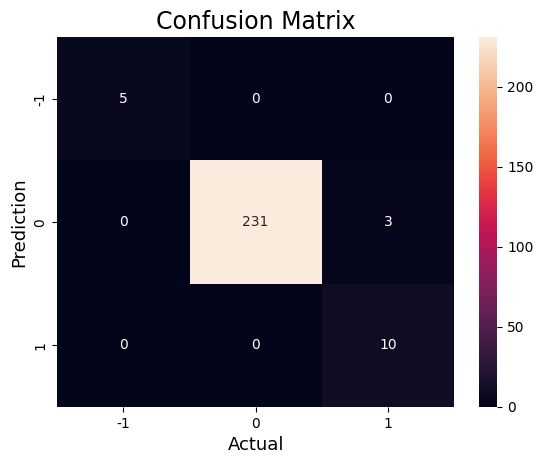

In [73]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Menggunakan k-fold = 5

In [74]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, n_jobs=6, scoring='accuracy', verbose=1)

In [75]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [76]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.004468,0.002601,0.001804,0.003609,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.994975,0.979899,0.979899,0.994975,0.989899,0.987930,0.006813,1
4,0.005077,0.003408,0.006655,0.002169,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.989950,0.984925,0.964824,0.994975,0.994949,0.985925,0.011187,2
7,0.017040,0.003826,0.001060,0.001421,100,poly,"{'C': 100, 'kernel': 'poly'}",0.994975,0.984925,0.979899,0.979899,0.984848,0.984909,0.005505,3
5,0.007366,0.004160,0.004664,0.004896,10,poly,"{'C': 10, 'kernel': 'poly'}",0.984925,0.979899,0.964824,0.979899,0.974747,0.976859,0.006824,4
2,0.005972,0.001768,0.006570,0.004014,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.964824,0.969849,0.949749,0.964824,0.964646,0.962779,0.006806,5
1,0.009605,0.003315,0.001005,0.001269,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.954774,0.959799,0.959799,0.964824,0.964646,0.960768,0.003723,6
3,0.011941,0.001503,0.000000,0.000000,1,poly,"{'C': 1, 'kernel': 'poly'}",0.954774,0.959799,0.959799,0.964824,0.964646,0.960768,0.003723,6
0,0.010451,0.005523,0.005588,0.001816,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.944724,0.939698,0.939698,0.949749,0.949495,0.944673,0.004439,8


In [77]:
grid_search.best_params_

{'C': 100, 'kernel': 'rbf'}

In [78]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9969818913480886, 0.9879518072289156)

In [79]:
# preduction
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      0.99      0.99       234
           1       0.77      1.00      0.87        10

    accuracy                           0.99       249
   macro avg       0.92      1.00      0.95       249
weighted avg       0.99      0.99      0.99       249



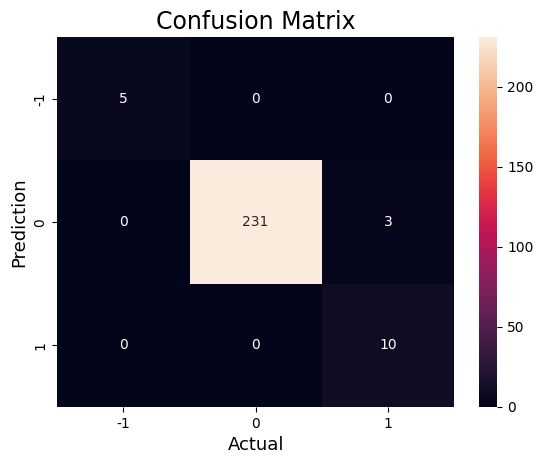

In [80]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Menggunakan k-fold = 7

In [81]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=7, n_jobs=6, scoring='accuracy', verbose=1)

In [82]:
grid_search.fit(X_train, y_train)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


GridSearchCV(cv=7, estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [83]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
6,0.006753,0.006732,0.005092,0.006177,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.992958,0.978873,0.992958,0.978873,1.000000,0.985915,0.992958,0.988934,0.007393,1
7,0.016185,0.002598,0.003536,0.004225,100,poly,"{'C': 100, 'kernel': 'poly'}",0.992958,0.992958,0.978873,0.978873,1.000000,0.964789,0.985915,0.984909,0.010928,2
4,0.007906,0.004836,0.003205,0.003709,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.985915,0.971831,0.992958,0.957746,1.000000,0.978873,1.000000,0.983903,0.014439,3
5,0.015561,0.003291,0.004241,0.003718,10,poly,"{'C': 10, 'kernel': 'poly'}",0.978873,0.985915,0.978873,0.971831,1.000000,0.978873,0.971831,0.980885,0.008998,4
2,0.015968,0.007907,0.005168,0.003253,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.964789,0.978873,0.971831,0.943662,0.978873,0.957746,0.964789,0.965795,0.011558,5
1,0.009746,0.003018,0.004441,0.003848,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.943662,0.964789,0.964789,0.964789,0.964789,0.957746,0.964789,0.960765,0.007393,6
3,0.012393,0.004486,0.003167,0.003764,1,poly,"{'C': 1, 'kernel': 'poly'}",0.943662,0.964789,0.964789,0.964789,0.964789,0.957746,0.964789,0.960765,0.007393,6
0,0.007541,0.005123,0.007675,0.006051,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.936620,0.957746,0.950704,0.929577,0.950704,0.950704,0.950704,0.946680,0.009110,8


In [84]:
grid_search.best_params_

{'C': 100, 'kernel': 'rbf'}

In [85]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9969818913480886, 0.9879518072289156)

In [86]:
# preduction
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      0.99      0.99       234
           1       0.77      1.00      0.87        10

    accuracy                           0.99       249
   macro avg       0.92      1.00      0.95       249
weighted avg       0.99      0.99      0.99       249



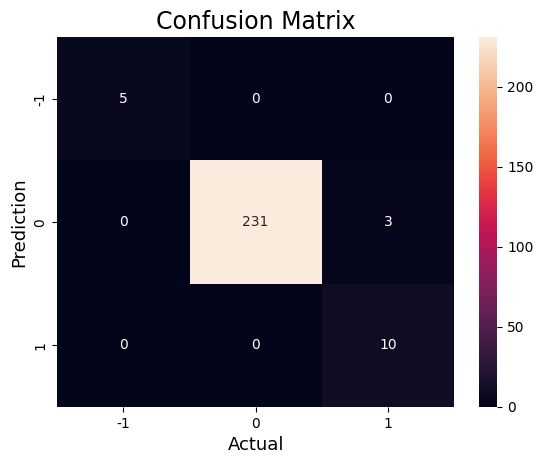

In [87]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Menggunakan k-fold = 9

In [88]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=9, n_jobs=6, scoring='accuracy', verbose=1)

In [89]:
grid_search.fit(X_train, y_train)

Fitting 9 folds for each of 8 candidates, totalling 72 fits


GridSearchCV(cv=9, estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [90]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
4,0.003778,0.003221,0.004055,0.005125,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.990991,0.981982,0.990991,0.963964,0.981818,1.000000,1.000000,0.981818,1.000000,0.987952,0.011256,1
6,0.008527,0.007634,0.002077,0.004888,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.981982,0.990991,0.981982,0.972973,0.963636,1.000000,0.990909,0.981818,0.990909,0.983911,0.010271,2
7,0.017130,0.009556,0.000000,0.000000,100,poly,"{'C': 100, 'kernel': 'poly'}",0.981982,0.990991,0.972973,0.990991,0.972727,1.000000,0.972727,0.990909,0.981818,0.983902,0.009345,3
5,0.013654,0.005647,0.000000,0.000000,10,poly,"{'C': 10, 'kernel': 'poly'}",0.972973,0.990991,0.981982,0.990991,0.963636,1.000000,0.990909,0.990909,0.963636,0.982892,0.012442,4
2,0.010590,0.004032,0.004613,0.003692,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.963964,0.972973,0.963964,0.954955,0.954545,0.972727,0.990909,0.945455,0.963636,0.964792,0.012429,5
1,0.015979,0.006086,0.001295,0.002169,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.936937,0.963964,0.954955,0.963964,0.963636,0.972727,0.963636,0.954545,0.963636,0.959778,0.009544,6
3,0.013180,0.004888,0.002031,0.003334,1,poly,"{'C': 1, 'kernel': 'poly'}",0.936937,0.963964,0.954955,0.963964,0.963636,0.972727,0.963636,0.954545,0.963636,0.959778,0.009544,6
0,0.012417,0.004804,0.005336,0.003759,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.936937,0.954955,0.936937,0.954955,0.945455,0.954545,0.963636,0.936364,0.954545,0.948703,0.009482,8


In [91]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [92]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9919517102615694, 0.9839357429718876)

In [93]:
# preduction
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      0.99      0.99       234
           1       0.75      0.90      0.82        10

    accuracy                           0.98       249
   macro avg       0.92      0.96      0.94       249
weighted avg       0.99      0.98      0.98       249



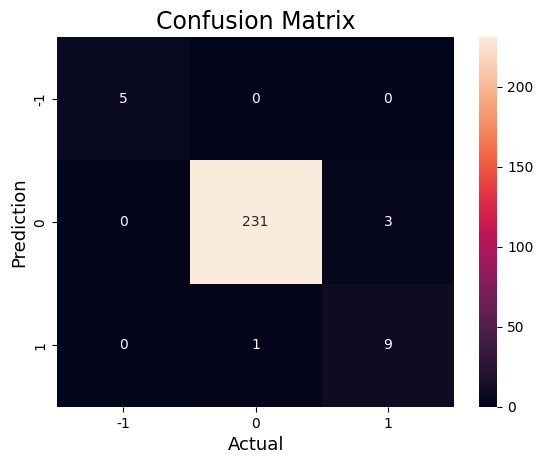

In [94]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Menggunakan k-fold = 11

In [95]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=11, n_jobs=6, scoring='accuracy', verbose=1)

In [96]:
grid_search.fit(X_train, y_train)

Fitting 11 folds for each of 8 candidates, totalling 88 fits


GridSearchCV(cv=11, estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [97]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score
4,0.006981,0.004117,0.002844,0.002502,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.000000,0.978022,0.978022,...,0.955556,0.988889,0.988889,1.000000,0.977778,0.988889,1.000000,0.985914,0.012591,1
6,0.008925,0.002662,0.004108,0.002448,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.989011,0.989011,0.967033,...,0.966667,0.955556,1.000000,1.000000,0.988889,0.988889,0.988889,0.983905,0.013673,2
7,0.017529,0.005317,0.002390,0.002921,100,poly,"{'C': 100, 'kernel': 'poly'}",0.978022,0.989011,0.989011,...,0.988889,0.977778,1.000000,1.000000,0.955556,0.988889,0.977778,0.983905,0.011939,2
5,0.014666,0.005052,0.003632,0.002959,10,poly,"{'C': 10, 'kernel': 'poly'}",0.956044,1.000000,0.978022,...,0.966667,0.966667,1.000000,1.000000,0.988889,0.988889,0.955556,0.979887,0.016216,4
2,0.007502,0.002971,0.005072,0.003548,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.967033,0.967033,0.967033,...,0.955556,0.955556,0.966667,0.988889,0.977778,0.955556,0.977778,0.967810,0.009988,5
1,0.011990,0.003366,0.001636,0.002761,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.945055,0.956044,0.956044,...,0.955556,0.966667,0.966667,0.966667,0.966667,0.955556,0.966667,0.960784,0.007129,6
3,0.012003,0.004481,0.003976,0.003268,1,poly,"{'C': 1, 'kernel': 'poly'}",0.945055,0.956044,0.956044,...,0.955556,0.955556,0.966667,0.966667,0.966667,0.955556,0.966667,0.959774,0.007010,7
0,0.007394,0.004835,0.005711,0.003781,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.945055,0.945055,0.945055,...,0.955556,0.933333,0.944444,0.955556,0.955556,0.944444,0.955556,0.946698,0.007806,8


In [98]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [99]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9919517102615694, 0.9839357429718876)

In [100]:
# preduction
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       1.00      0.99      0.99       234
           1       0.75      0.90      0.82        10

    accuracy                           0.98       249
   macro avg       0.92      0.96      0.94       249
weighted avg       0.99      0.98      0.98       249



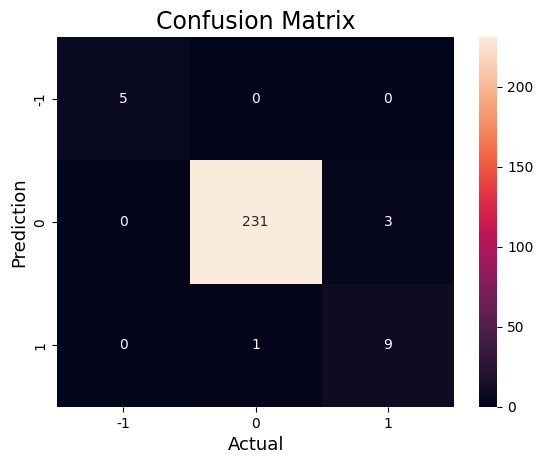

In [101]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Tanpa menggunakan GridSearch

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# Data yang akan digunakan
X = df_normalized[['Open', 'Low', 'High', 'Close', 'Adj Close', 'Volume', 'RSI']]
y = df_normalized['Target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
# Definisikan model SVM dengan parameter yang telah Anda tentukan
svm_model = SVC(kernel='rbf', C=100)  # Disesuaikan dengan parameter yang Anda inginkan
# svm_model = SVC(kernel='poly', C=100)  # Disesuaikan dengan parameter yang Anda inginkan

In [105]:
# cv_score = cross_val_score(svm_model, X_train, y_train, cv=3)
# print("Accuracy on test data:", cv_score)
# print("Accuracy on test data:", cv_score.mean())

In [106]:
# Lakukan cross-validation dengan nilai k-fold = 3
cv_predictions = cross_val_predict(svm_model, X_train, y_train, cv=3)

In [107]:
# preduction pada data uji
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)

In [109]:
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9879518072289156


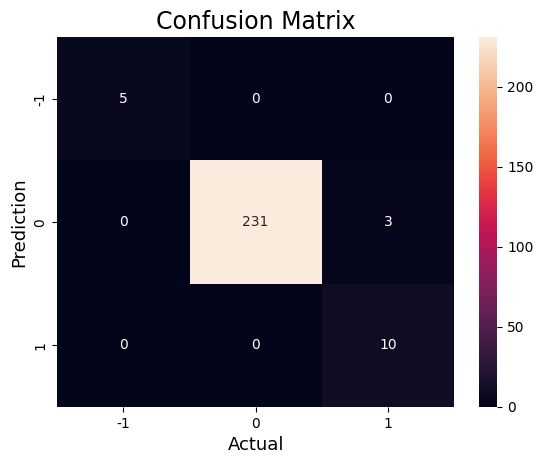

In [110]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
